# PROJECT:HEART DISEASE PREDICTION

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df = pd.read_csv("cleveland.csv",names=['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target'])


In [3]:
#Lets see the first 5 rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
#Lets check the shape of the data
df.shape
# There are 13 features and 1 Target(num) and have 303 rows

(303, 14)

In [5]:
# Lets check the datatypes
df.dtypes 


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [6]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


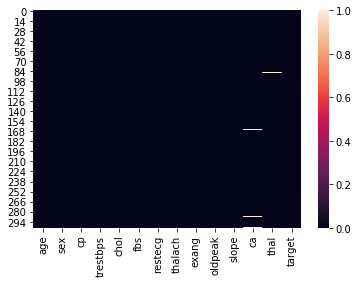

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# There are few  missing values in ca and  thal

In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are 4 missing values in ca and 2 missing values in thal

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [9]:
#Lets deal with missing values
# if these would have been large number we would have impute using mean/median/mode
# as these are very less we can drop them
df.dropna(inplace=True)

In [10]:
#Lets check the missing values once more
df.isnull().sum()
#Great to see missing values have been dropped

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Lets check the shape again
df.shape
#6 rows having missing values have been removed

(297, 14)

In [12]:
# Lets see the descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can see some features have positive correlation with target and some have negative

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


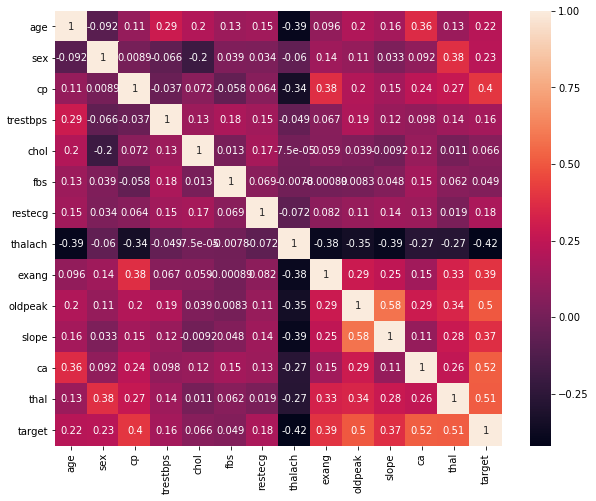

In [14]:
# lets visualize the correlation with heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


In [15]:
# Lets see target distribution
df['target'].value_counts()
# we know that 0: no heart disease and 1,2,3,4 :heart disease

0    160
1     54
3     35
2     35
4     13
Name: target, dtype: int64

In [16]:
# Lets group them into 2 categories 0: no heart disease and 1,2,3,4 : heart disease
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [17]:
# Lets see target distribution again
df['target'].value_counts()
#Now data seems almost balanced

0    160
1    137
Name: target, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006DDE6D96A0>,
      dtype=object)

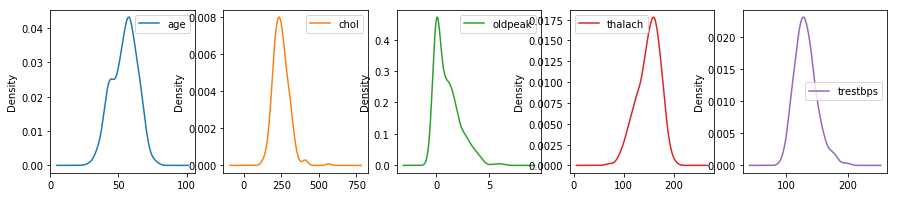

In [18]:
# # Univariate Density Plots of all numeric(non categorical) variables
df[['age','chol','oldpeak','thalach','trestbps']].plot(kind='density', subplots=True, layout=(1,5), sharex=False, figsize=(15,3))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006DDF82DF28>,
      dtype=object)

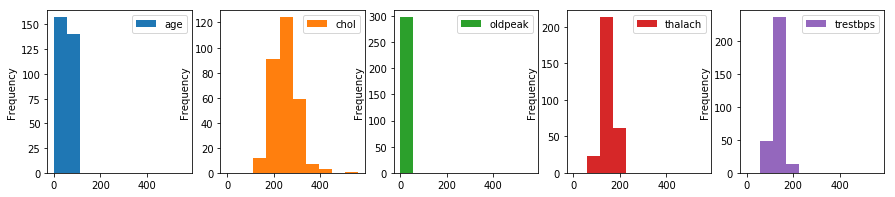

In [19]:
#Lets visualize distribution of  numeric(non categorical) data
df[['age','chol','oldpeak','thalach','trestbps']].plot(kind='hist', subplots=True, layout=(1,5), sharex=False, sharey= False, figsize=(15,3))


age            AxesSubplot(0.125,0.125;0.133621x0.755)
chol        AxesSubplot(0.285345,0.125;0.133621x0.755)
oldpeak      AxesSubplot(0.44569,0.125;0.133621x0.755)
thalach     AxesSubplot(0.606034,0.125;0.133621x0.755)
trestbps    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

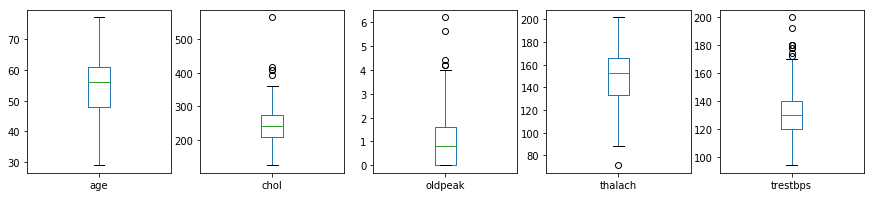

In [20]:
#Lets plot the box plot of each numeric variable
df[['age','chol','oldpeak','thalach','trestbps']].plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False, figsize=(15,3))
#There seems the presence of few outliers in the data

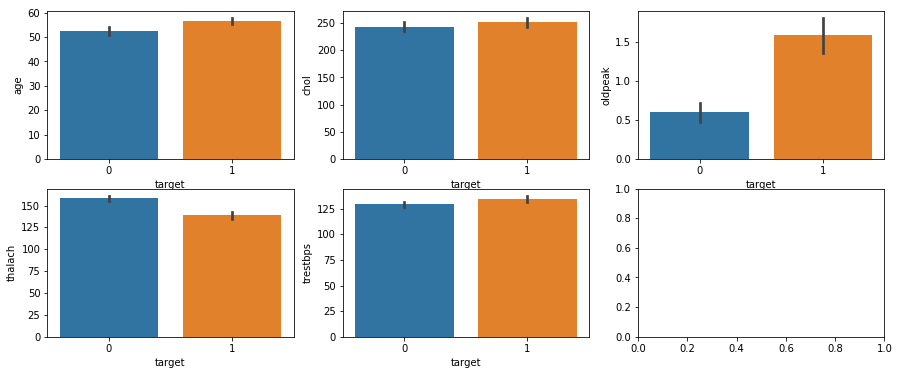

In [21]:
#Lets visualize relation of numeric paramters with respect to 'Target'
f,axes= plt.subplots(2,3, figsize=(15,6))
sns.barplot(x='target', y ='age', data=df,ax=axes[0,0])
sns.barplot(x='target', y ='chol', data=df, ax=axes[0,1])
sns.barplot(x='target', y ='oldpeak', data=df, ax=axes[0,2])
sns.barplot(x='target', y ='thalach', data=df, ax=axes[1,0])
sns.barplot(x='target', y ='trestbps', data=df, ax=axes[1,1])



In [22]:
#As the ca and thal can have only discrete numeric values lets change then to integer
df['ca'] = df['ca'].astype('int64')
df['thal'] = df['thal'].astype('int64')

In [23]:
#Lets check the datatypes again
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [24]:
#Lets visualize the dataframe again to see values of ca and thal
df[['ca','thal']].head()


,ca,thal
0,0,6
1,3,3
2,2,7
3,0,3
4,0,3


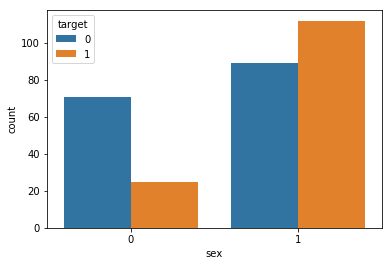

In [25]:
#Lets visualize relation of sex with respect to 'Target'
sns.countplot(x='sex', hue ='target', data=df)
#  We can see that Females are more likely to have heart disease

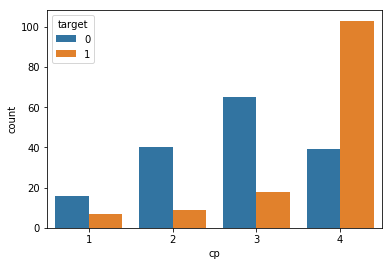

In [26]:
#Lets visualize relation of chestpain with respect to 'Target'
sns.countplot(x='cp', hue ='target', data=df)
#  People with asymptomatic chest pain(4) have higher chances of heart disease

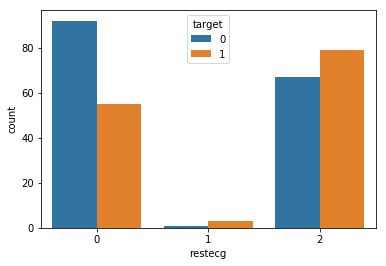

In [27]:
#Lets visualize relation of restecg with respect to 'Target'
sns.countplot(x='restecg', hue ='target', data=df)
# As expected people with normal value of rest ecg have lesser chances of heart disease then restecg value of 1 and 2


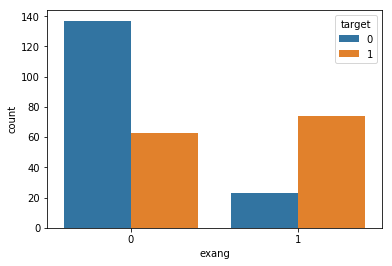

In [28]:
#Lets visualize relation of exang with respect to 'Target'
sns.countplot(x='exang', hue ='target', data=df)
# We can see that people with exercise induced angina have higher chances of heart disease then the one who does not have


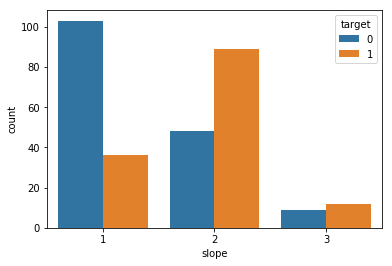

In [29]:
#Lets visualize relation of slope with respect to 'Target'
sns.countplot(x='slope', hue ='target', data=df)
# We can see that people with slope of 1 have lesser  chances of heart disease then the one who have slope of 2 and 3


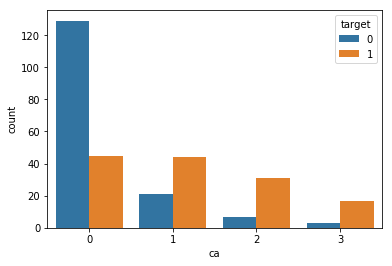

In [30]:
#Lets visualize relation of ca with respect to 'Target'
sns.countplot(x='ca', hue ='target', data=df)
# We can see that people with ca of 0 have lesser  chances of heart disease then the one who have ca of 1 , 2 and 3
# as ca increase the chances of heart diseases are more


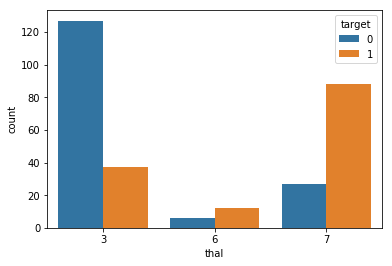

In [31]:
#Lets visualize relation of thal with respect to 'Target'
sns.countplot(x='thal', hue ='target', data=df)
# As expected the people thal value of 3 (normal) have lesser  chances of heart disease then the one who have thal of 6 and 7
# as thal value increase the chances of heart diseases are more
# when thal value is 7 the chances of heart disease are highest


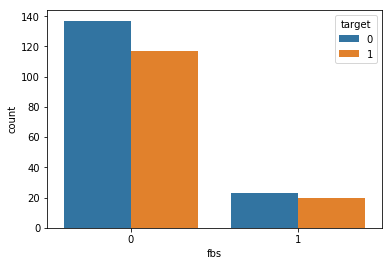

In [32]:
#Lets visualize relation of fasting blood sugrar with respect to 'Target'
sns.countplot(x='fbs', hue ='target', data=df)


In [33]:
#Lets check the skewness 
df.skew()

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.700070
chol        1.118096
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     1.247131
slope       0.510444
ca          1.179548
thal        0.247772
target      0.156138
dtype: float64

In [34]:
# Let us reduce the  positive Skewness
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])


In [35]:
#Lets check the skewness again
df.skew()
#the skewness has been reduced except for categorical variables

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.282484
chol        0.061315
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     0.373601
slope       0.510444
ca          0.739166
thal        0.247772
target      0.156138
dtype: float64

In [36]:
#Lets reduce negative skewness
for col in df.columns:                                      
    if df.skew().loc[col]<-0.55:
        df[col]=np.power(df[col],2)

In [37]:
#Lets check the skewness
df.skew()

age        -0.219775
sex        -0.759727
cp         -0.440398
trestbps    0.282484
chol        0.061315
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     0.373601
slope       0.510444
ca          0.739166
thal        0.247772
target      0.156138
dtype: float64

In [38]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (297, 14)
The shape of dataframe after removing outliers is = (292, 14)


In [39]:
# Let us seperate the features and Target
x=dfx.drop(['target'],axis=1)    
y=dfx[['target']]

In [40]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,4.983607,5.455321,0.693147,2,150,0.000000,1.193922,3,0.000000,6
1,67,1,16,5.081404,5.659482,0.000000,2,108,0.693147,0.916291,2,1.386294,3
2,67,1,16,4.795791,5.438079,0.000000,2,129,0.693147,1.280934,2,1.098612,7
3,37,1,9,4.875197,5.525453,0.000000,0,187,0.000000,1.504077,3,0.000000,3
4,41,0,4,4.875197,5.323010,0.000000,2,172,0.000000,0.875469,1,0.000000,3


In [41]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,target
0,0
1,1
2,1
3,0
4,0


In [42]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [43]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [44]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [45]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.832184 (0.063913)
LDA: 0.839080 (0.061123)
KNN: 0.818621 (0.056744)
DT: 0.753103 (0.064042)
NB: 0.839195 (0.064762)
SVM: 0.838966 (0.067185)


In [46]:
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
4,NB,0.839195
1,LDA,0.839080
5,SVM,0.838966
0,LR,0.832184
2,KNN,0.818621
3,DT,0.753103


In [47]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy
# by default they work on decision  tree so scaling is not required
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
ensemble = [('RF', RandomForestClassifier(random_state=5)),('ADC',AdaBoostClassifier(random_state=5)),('GBC',GradientBoostingClassifier(random_state=5))]
results1 = []
names1 = []
for name, model in ensemble: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)                                              


RF: 0.811379 (0.079463)
ADC: 0.797816 (0.054470)
GBC: 0.794368 (0.096383)


In [48]:
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
0,RF,0.811379
1,ADC,0.797816
2,GBC,0.794368


In [49]:
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
4,NB,0.839195
1,LDA,0.839080
5,SVM,0.838966
0,LR,0.832184
2,KNN,0.818621
0,RF,0.811379
1,ADC,0.797816
2,GBC,0.794368
3,DT,0.753103


In [50]:
# We can see that Gaussian NB, Logistics regression, LDA, ,SVM are very close in performance
#  Lets select SVM for implementation as its has several hyper paramters which can easily be tuned

#Lets try to tune paramters of SVC  to find better cross val score

In [51]:
#Lets try to check if  cross val performance of SVC can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1) 
scaler = StandardScaler().fit(x)
scaledX = scaler.transform(x)
c_values =  [0.01,0.1,0.5, 1, 2, 3, 4, 5,10,100]
gamma = [0.0001,0.0005,0.001,0.01,0.1,1,2,10]
kernel=['rbf','linear','poly']
param_grid = dict(C=c_values,gamma=gamma,kernel=kernel)

model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfoldx,n_jobs=-1)
grid_result = grid.fit(scaledX, y)

In [52]:
#Lets check best cross val score
grid_result.best_score_
# cross val score has been improved  from 0.8389 to 0.8561

0.8561643835616438

In [53]:
#Lets check best parameters
grid_result.best_params_ 

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [54]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [55]:
#Lets find out the best random state for selected SVC for best paramters

max_accuracy=0
svc= SVC(C=10,gamma=0.001,kernel='rbf')
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=i)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    svc.fit(X_train,y_train)
    ypreds=svc.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.8135593220338984
At random state  2 the value of accuracy is  0.8813559322033898
At random state  3 the value of accuracy is  0.8305084745762712
At random state  4 the value of accuracy is  0.864406779661017
At random state  5 the value of accuracy is  0.8813559322033898
At random state  6 the value of accuracy is  0.7966101694915254
At random state  7 the value of accuracy is  0.7288135593220338
At random state  8 the value of accuracy is  0.8983050847457628
At random state  9 the value of accuracy is  0.7796610169491526
At random state  10 the value of accuracy is  0.8813559322033898
At random state  11 the value of accuracy is  0.7627118644067796
At random state  12 the value of accuracy is  0.8305084745762712
At random state  13 the value of accuracy is  0.8135593220338984
At random state  14 the value of accuracy is  0.7457627118644068
At random state  15 the value of accuracy is  0.847457627118644
At random state  16 the value of acc

In [56]:
#Lets once again verify its  cross val  accuracy score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(SVC(C=10,gamma=0.001,kernel='rbf'),scaledX,y,cv=kfoldx,scoring="accuracy").mean()

0.8560919540229885

In [57]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 49)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
SVM= SVC(C=10,gamma=0.001,kernel='rbf')
SVM.fit(X_train,y_train)
ypred=SVM.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.9661016949152542


In [58]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('SVC_HEART_prediction.csv')

In [59]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[33  0]
 [ 2 24]]


In [60]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))

classification report =                precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

   micro avg       0.97      0.97      0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



AUC: 0.962


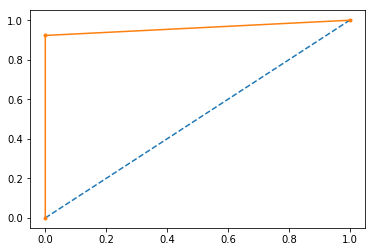

In [61]:
# calculate AUC
auc = roc_auc_score(y_test, ypred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [62]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(SVM,'SVC_HEART.pkl')

['SVC_HEART.pkl']